### Workbook on
# Art of becoming The Sherlock Holmes: A comprehensive guide to Pandas

# [Getting the case ready](#sec1)
* [Data cleaning](#sec1a)
* [Dealing with missing values](#sec1b)
* [A tryout](#sec1c)
* [Checking duplicate entries](#sec1d)
* [Checking outliers](#sec1e)

# [Answering the mysteries](#sec2)
* [Uncovering the rumours](#sec2a)
* [Mining Insights](#sec2b)

#### Necessary libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# <a id='sec1'>Getting the case ready</a>

#### Loading the data set

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 8.4 MB


In [3]:
df.columns           #  <- retrieves all column names
df.index             #  <- retrieves all index values
df.values            #  <- retrieves main body of df
df.dtypes            #  <- retrieves datatype of each column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Question 1: Renaming the columns

In [4]:
df.rename(columns={'Content Rating': 'ContentRating',
                  'Last Updated': 'LastUpdated',
                  'Current Ver': 'CurrentVer',
                  'Android Ver': 'AndroidVer'}, inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

## <a id='sec1a'>Data cleaning</a>

In [5]:
# Fetching the entity which has string
df.Reviews[df.Reviews.str.contains('[^0-9]')]

10472    3.0M
Name: Reviews, dtype: object

In [6]:
df.Size[df.Size.str.contains('[^0-9]')].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [7]:
df.Installs[df.Installs.str.contains('[a-z]')]

10472    Free
Name: Installs, dtype: object

In [8]:
df.Price[df.Price.str.contains('[a-z]')]

10472    Everyone
Name: Price, dtype: object

In [9]:
# Dropping row 10472
df.drop(10472, inplace=True)

In [10]:
# Changing the datatype of Reviews column back to numeric
df.Reviews = df.Reviews.astype(int)

In [11]:
df.loc[5:10, 'Installs']

5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
10    1,000,000+
Name: Installs, dtype: object

In [12]:
df.iloc[1832:1839, 7]

1832    $1.99
1833    $4.99
1834    $4.99
1835    $4.99
1836    $5.99
1837    $6.99
1838    $9.99
Name: Price, dtype: object

In [13]:
df.Installs = df.Installs.str.replace(',','')   # Replacing ',' with ''
df.Installs.head()

0       10000+
1      500000+
2     5000000+
3    50000000+
4      100000+
Name: Installs, dtype: object

In [14]:
df.Installs = df.Installs.str.replace('+','').astype(int) #Replacing '+' with '' and converting datatype back to numeric
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [15]:
df.Price = df.Price.str.lstrip('$').astype(np.float32)
df.iloc[1832:1839, 7]

1832    1.99
1833    4.99
1834    4.99
1835    4.99
1836    5.99
1837    6.99
1838    9.99
Name: Price, dtype: float32

#### Question 2 - Reformatting Size column

In [16]:
m = {'k': 3, 'M': 6}
df.Size = [int(float(i[:-1]) * 10 ** m[i[-1]]) if i != 'Varies with device' else i for i in df.Size]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App              10840 non-null object
Category         10840 non-null object
Rating           9366 non-null float64
Reviews          10840 non-null int64
Size             10840 non-null object
Installs         10840 non-null int64
Type             10839 non-null object
Price            10840 non-null float32
ContentRating    10840 non-null object
Genres           10840 non-null object
LastUpdated      10840 non-null object
CurrentVer       10832 non-null object
AndroidVer       10838 non-null object
dtypes: float32(1), float64(1), int64(2), object(9)
memory usage: 1.4+ MB


## <a id='sec1b'>Dealing with missing values</a>

In [18]:
actual_values = df.count()
total_values = df.shape[0]
miss_perct = np.round((1 - (actual_values/total_values)) * 100, 2)
miss_perct

App               0.00
Category          0.00
Rating           13.60
Reviews           0.00
Size              0.00
Installs          0.00
Type              0.01
Price             0.00
ContentRating     0.00
Genres            0.00
LastUpdated       0.00
CurrentVer        0.07
AndroidVer        0.02
dtype: float64

In [19]:
type(miss_perct)

pandas.core.series.Series

## <a id='sec1c'>A tryout</a>

In [20]:
# Method 1
df_miss = pd.DataFrame(miss_perct.values, index=miss_perct.index, columns=['percent'])

# # Method 2
# df_miss = pd.DataFrame(miss_perct, columns=['percent'])

df_miss

,percent
App,0.00
Category,0.00
Rating,13.60
Reviews,0.00
Size,0.00
Installs,0.00
Type,0.01
Price,0.00
ContentRating,0.00
Genres,0.00


In [21]:
# Number of missing values per column
df_miss['miss_count'] = len(df) - df.count()
df_miss.head()

,percent,miss_count
App,0.0,0
Category,0.0,0
Rating,13.6,1474
Reviews,0.0,0
Size,0.0,0


In [22]:
df_miss.tail(8)

,percent,miss_count
Installs,0.00,0
Type,0.01,1
Price,0.00,0
ContentRating,0.00,0
Genres,0.00,0
LastUpdated,0.00,0
CurrentVer,0.07,8
AndroidVer,0.02,2


In [23]:
# Adding index values as new column to make it as tidy-dataframe for input to seaborn
df_miss = df_miss.reset_index()  # <- If you add reset_index(drop=True) then index column is dropped
df_miss.head(3)

,index,percent,miss_count
0,App,0.0,0
1,Category,0.0,0
2,Rating,13.6,1474


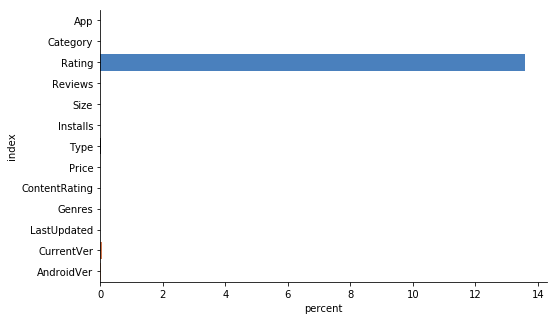

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x="percent", y="index", data=df_miss, palette='icefire')
sns.despine()
plt.show()

In [25]:
# Filling missing values in Quantitative feature by median
for col in df.select_dtypes('float64'):
    df.loc[:, col].fillna(df.loc[:, col].median(), inplace=True)

In [26]:
# Filling missing values in Qualitative feature by mode
for col in df.select_dtypes('object'):
    df.loc[:, col].fillna(sp.stats.mode(df.loc[:, col].astype(str))[0][0], inplace=True)

/home/vivek/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App              10840 non-null object
Category         10840 non-null object
Rating           10840 non-null float64
Reviews          10840 non-null int64
Size             10840 non-null object
Installs         10840 non-null int64
Type             10840 non-null object
Price            10840 non-null float32
ContentRating    10840 non-null object
Genres           10840 non-null object
LastUpdated      10840 non-null object
CurrentVer       10840 non-null object
AndroidVer       10840 non-null object
dtypes: float32(1), float64(1), int64(2), object(9)
memory usage: 1.4+ MB


## <a id='sec1d'>Checking duplicate entries</a>

In [28]:
total_duplicates = len(df[df.duplicated()])
total_duplicates

483

In [29]:
print('The data has ' + str(np.round(total_duplicates/len(df) * 100, 2)) + '% of duplicate data')

The data has 4.46% of duplicate data


In [30]:
df.drop_duplicates(inplace=True)

In [31]:
print('New shape of data set: ' + str(df.shape))

New shape of data set: (10357, 13)


In [32]:
# Also let us check if duplicate entries of Apps are present or not
app_duplicates = len(df[df.App.duplicated()])
app_duplicates

698

In [33]:
print('The data has ' + str(np.round(app_duplicates/len(df) * 100, 2)) + '% of duplicate apps')

The data has 6.74% of duplicate apps


In [34]:
df = df[~df.App.duplicated()].reset_index(drop=True)
df.shape

(9659, 13)

## <a id='sec1e'>Checking outliers</a>

In [35]:
# Selecting required features and storing them into a new dataframe
df_temp = df.loc[:,['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

In [36]:
# Replacing 'Varies with device' values under Size column with 0
df_temp.Size.replace('Varies with device', 0, inplace=True)

/home/vivek/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


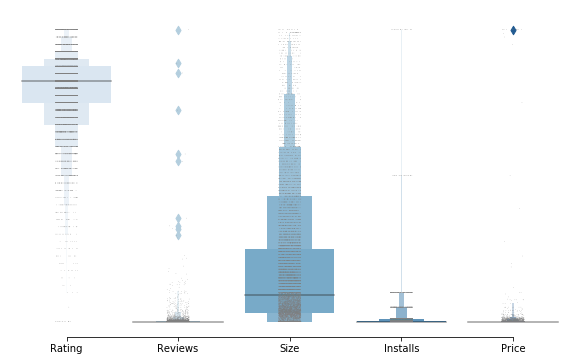

In [37]:
# Normalizing values to visualize each feature in one plot
temp = pd.melt(pd.DataFrame(MinMaxScaler().fit_transform(df_temp)))

plt.figure(figsize=(10,6))
sns.boxenplot(x='variable', y='value', data=temp, palette='Blues')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

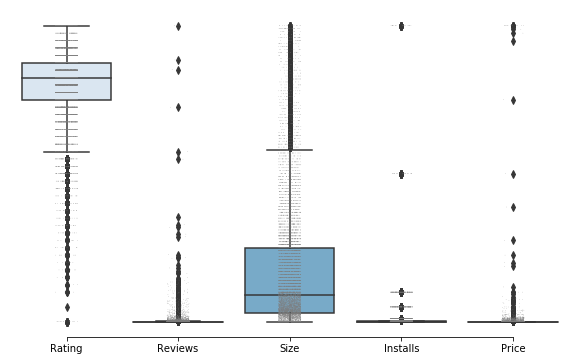

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=temp, palette='Blues')
sns.stripplot(x='variable', y='value', data=temp, size=0.5, jitter=True, color="gray")
plt.xticks(np.arange(df_temp.shape[1]), df_temp.columns)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True,trim=True)
plt.show()

# <a id='sec2'>Answering the mysteries</a>

## <a id='sec2a'>Uncovering the rumours</a>

#### Pairplot and correlation heatmap

/home/vivek/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 504x360 with 0 Axes>

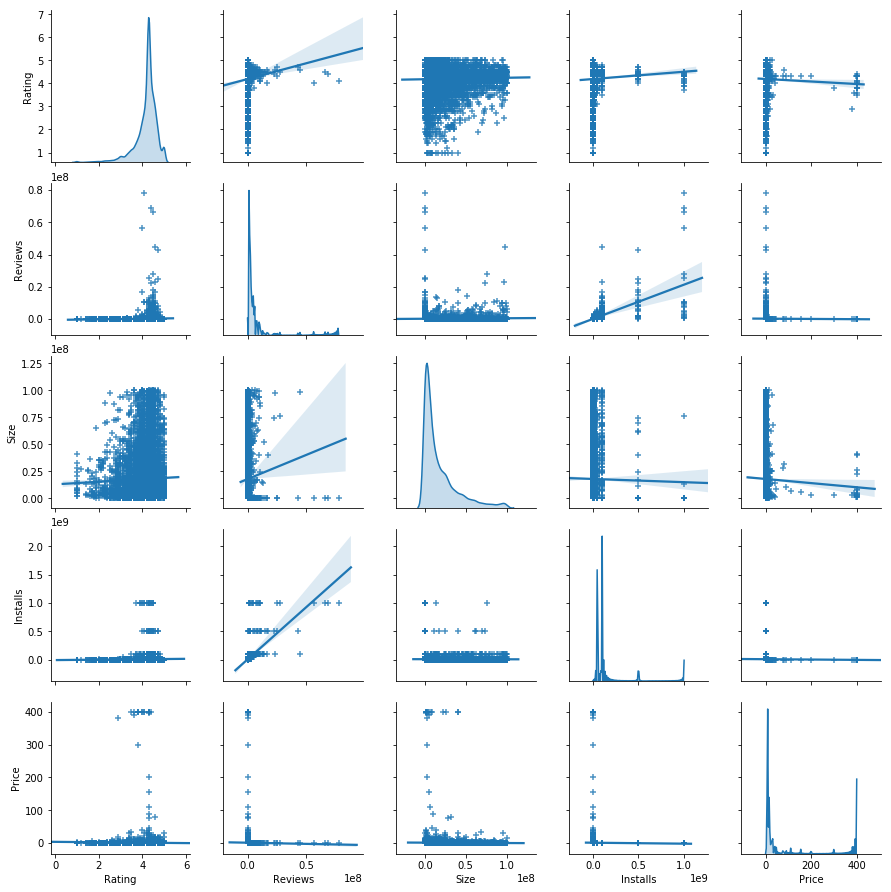

In [39]:
plt.figure(figsize=(7, 5))

sns.pairplot(df_temp, kind='reg', diag_kind='kde', markers='+')

plt.show()

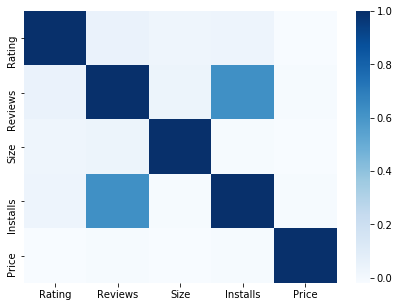

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(df_temp.corr(), cmap='Blues')
plt.show()

#### 1. Division of apps rating

In [41]:
rate = df.Rating.apply(lambda x: np.round(x * 2)/2) # Rounding to the nearest 0.5
# Retrieving the frequency of each unique rating
val, cnt = np.unique(rate, return_counts=True)
df_rate = pd.DataFrame([val, cnt]).T
df_rate.columns = ['val', 'cnt']

#### 2. Ratio of app type as per app rating

In [42]:
df_rating_type = pd.DataFrame([rate, df.Type]).T

#### 3. App rating per type of content 

In [43]:
df_rating_content = pd.DataFrame([rate, df.ContentRating]).T

#### 4. Ratio of rating per top 6 genres

In [44]:
df_rating_genres = pd.DataFrame([rate, df.Genres]).T
# Finding top 6 Genres with highest number of apps 
val_g, cnt_g = np.unique(df_rating_genres.Genres, return_counts=True)
df_genres = pd.DataFrame([val_g, cnt_g]).T
df_genres.columns = ['Genres', 'Count']
df_genres.sort_values('Count', ascending=False, inplace=True)
df_genres = df_genres.iloc[:6,:].reset_index(drop=True) 
# Subsetting dataframe for rows containing only these 6 generes
df_rating_genres = df_rating_genres[df_rating_genres.Genres.isin(df_genres.Genres)]

#### 5. Number of apps per category

In [45]:
ratio_cat_app = df.groupby('Category')['App'].count().reset_index()
ratio_cat_app.sort_values('App', ascending=False, inplace=True)

#### 6. Number of updates in each months, years and each year's months

In [46]:
# Converting the LastUpdated column to date column
df.LastUpdated = pd.to_datetime(df.LastUpdated, format='%B %d, %Y')
df.LastUpdated.head(2)

# 0   2018-01-07
# 1   2018-01-15
# Name: LastUpdated, dtype: datetime64[ns]

val_y, cnt_y = np.unique(df.LastUpdated.dt.year, return_counts=True)
val_m, cnt_m = np.unique(df.LastUpdated.dt.month, return_counts=True)

df_date = pd.DataFrame(df.LastUpdated.astype(str).str.split('-').tolist(), columns=list('YMD'))
df_date.head(3)

#      Y  M  D
# 0 2018 01 07
# 1 2018 01 15
# 2 2018 08 01

date_temp = df_date.groupby(['M','Y']).apply(lambda x: len(x)).unstack()                
date_temp.fillna(0, inplace=True)

# Generating sequence of Months
from datetime import datetime
months_seq = [datetime.strftime(datetime.strptime(str(_), "%m"), "%b") for _ in range(1,13)]

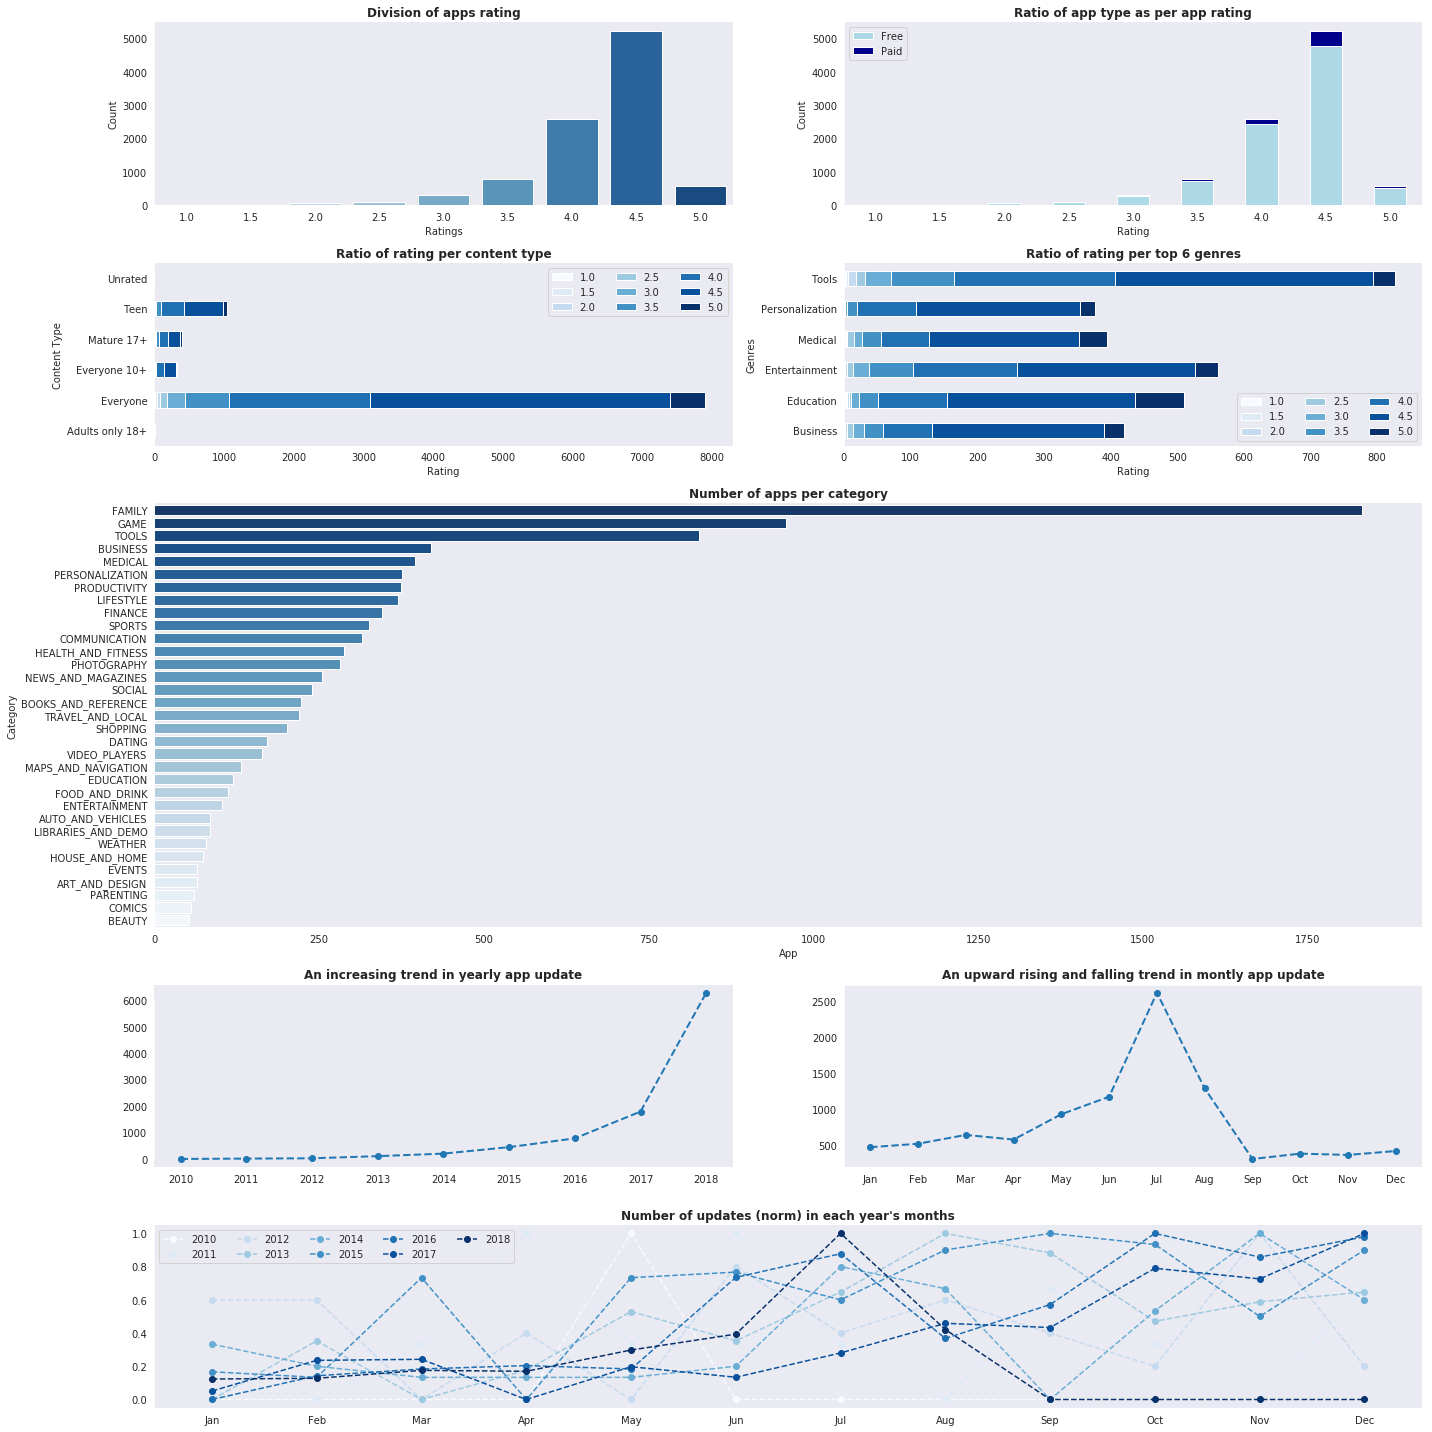

In [47]:
# 1 
plt.figure(figsize=(20, 20))
sns.set_style('dark')
row_mask = 6
col_mask = 2

ax1 = plt.subplot2grid((row_mask, col_mask), (0,0))
sns.barplot(x='val', y='cnt', data=df_rate, palette='Blues', ax=ax1)
sns.despine(ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlabel('Ratings')
ax1.set_title('Division of apps rating', weight='bold')


# 2
ax2 = plt.subplot2grid((row_mask, col_mask), (0,1))
df_rating_type.groupby(['Rating', 'Type']).\
            apply(lambda x: len(x)).unstack().\
            plot.bar(stacked=True, 
                    rot=0, color= ['lightblue', 'darkblue'], ax=ax2)
sns.despine(ax=ax2)
ax2.legend(loc='upper left')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Count')
ax2.set_title('Ratio of app type as per app rating', weight='bold')


# 3
ax3 = plt.subplot2grid((row_mask, col_mask), (1,0))
df_rating_content.groupby(['ContentRating', 'Rating']).\
                apply(lambda x: len(x)).unstack().\
                plot(kind='barh', stacked=True, 
                     rot=0, colormap='Blues', ax=ax3)
sns.despine(ax=ax3)
ax3.legend(loc='upper right', ncol=3)
ax3.set_xlabel('Rating')
ax3.set_ylabel('Content Type')
ax3.set_title('Ratio of rating per content type', weight='bold')


# 4
ax4 = plt.subplot2grid((row_mask, col_mask), (1,1))
df_rating_genres.groupby(['Genres', 'Rating']).\
                apply(lambda x: len(x)).unstack().\
                plot(kind='barh', stacked=True, 
                     rot=0, colormap='Blues', ax=ax4)
sns.despine(ax=ax4)
ax4.legend(loc='lower right', ncol=3)
ax4.set_xlabel('Rating')
ax4.set_title('Ratio of rating per top 6 genres', weight='bold')


# 5

ax5 = plt.subplot2grid((row_mask, col_mask), (2,0), rowspan=2, colspan=2)
sns.barplot(x='App', y='Category', data=ratio_cat_app, palette='Blues_r', ax=ax5)
sns.despine(ax=ax5)
ax5.set_title('Number of apps per category', weight='bold')


# 6a
ax6a = plt.subplot2grid((row_mask, col_mask), (4,0))
ax6a.plot(val_y, cnt_y, '--o', linewidth=2)
sns.despine(trim=True, ax=ax6a)
ax6a.set_title('An increasing trend in yearly app update', weight='bold')


# 6b
ax6b = plt.subplot2grid((row_mask, col_mask), (4,1))
ax6b.plot(months_seq, cnt_m, '--o', linewidth=2)
ax6b.set_title('An upward rising and falling trend in montly app update', weight='bold')


# 6c
ax6c = plt.subplot2grid((row_mask, col_mask), (5,0), colspan=2)
# Normalizing values so that all values can be visualized without any bias
pd.DataFrame(MinMaxScaler().fit_transform(date_temp), index=months_seq, columns=date_temp.columns).\
                plot(kind='line', style='--o', colormap='Blues', xticks=np.arange(12), ax=ax6c) 
ax6c.set_title('Number of updates (norm) in each year\'s months', weight='bold')
ax6c.legend(loc='upper left', ncol=5)
sns.despine(ax=ax6c)

plt.tight_layout()
plt.show()

In [48]:
sns.set_style('white')

#### Wordclouds

In [49]:
from wordcloud import WordCloud
import random

# Function to create gray wordcloud. 
# Credit: https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [50]:
# Creating dictionary of features against app names
wc_rating = pd.DataFrame(df_temp.Rating).set_index(df.App).to_dict()['Rating']
wc_reviews = pd.DataFrame(df_temp.Reviews).set_index(df.App).to_dict()['Reviews']
wc_size = pd.DataFrame(df_temp.Size).set_index(df.App).to_dict()['Size']
wc_installs = pd.DataFrame(df_temp.Installs).set_index(df.App).to_dict()['Installs']

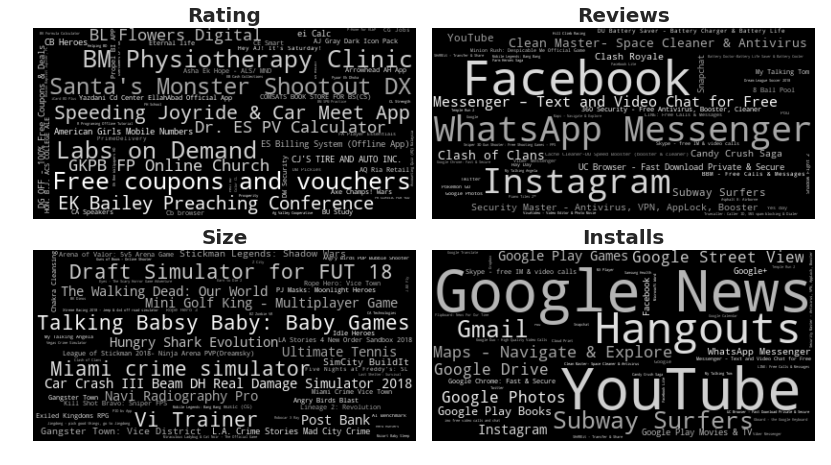

In [51]:
plt.figure(figsize=(14, 8))

r_c = 8

ax7 = plt.subplot2grid((r_c, r_c), (0,0), colspan=4, rowspan=4)
wc1 = WordCloud()
wc1.generate_from_frequencies(frequencies=wc_rating)
ax7.imshow(wc1.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax7.set_title('Rating', weight='bold', size=20)
ax7.axis("off")

ax8 = plt.subplot2grid((r_c, r_c), (0,4), colspan=4, rowspan=4)
wc2 = WordCloud()
wc2.generate_from_frequencies(frequencies=wc_reviews)
ax8.imshow(wc2.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax8.set_title('Reviews', weight='bold', size=20)
ax8.axis("off")

ax9 = plt.subplot2grid((r_c, r_c), (4,0), colspan=4, rowspan=4)
wc3 = WordCloud()
wc3.generate_from_frequencies(frequencies=wc_size)
ax9.imshow(wc3.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax9.set_title('Size', weight='bold', size=20)
ax9.axis("off")

ax10 = plt.subplot2grid((r_c, r_c), (4,4), colspan=4, rowspan=4)
wc4 = WordCloud()
wc4.generate_from_frequencies(frequencies=wc_installs)
ax10.imshow(wc4.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
ax10.set_title('Installs', weight='bold', size=20)
ax10.axis("off")

plt.show()

## <a id='sec2b'>Mining Insights</a>

In [52]:
print('Number of unique apps with 5 star rating: ', len(df[df.Rating == 5.0]))

Number of unique apps with 5 star rating:  271


In [53]:
df_5star = df[df.Rating == 5.0].reset_index() # Saving index to access Size from df_temp 

In [54]:
features = [
    df_5star.Category,
    df_5star.Reviews,
    df_temp.iloc[df_5star.iloc[:, 0],:].Size,
    df_5star.Installs,
    df_5star.Type,
    df_5star.ContentRating,
    df_5star.Genres,
    df_5star.LastUpdated,
    df_5star.AndroidVer
]

df_expect = pd.DataFrame(index=['Category', 'Reviews', 'Size', 'Installs', 
                                'Type', 'Content Rating', 'Genres', 'Last Updated', 'Android Version'],
                        columns=['Values'])

cnt = 0
for fea in features:
    val_t, cnt_t = np.unique(fea, return_counts=True)
    df_expect.iloc[cnt, 0] = pd.DataFrame([val_t, cnt_t]).T.sort_values(1, ascending=False).iloc[0,0]
    cnt += 1

df_expect

,Values
Category,FAMILY
Reviews,1
Size,11000000
Installs,100
Type,Free
Content Rating,Everyone
Genres,Education
Last Updated,2018-07-24 00:00:00
Android Version,4.1 and up
